# Power analysis for ET/NC comparison projects

1. Sample sizes needed for a randomnized experiemnts with alpha=0.05, power=0.9, and effect size 0.6; 
2. Post-hoc analysis of power with respect to efect size (with fixed alpha=0.05 and sample size=38/32);
3. Power analysis for existing literature.

In [1]:
from statsmodels.stats import power
import math
print(r'Number of Samples needed for alpha=0.05, power=0.9 and effect size=0.5: ')
print(math.ceil(power.tt_ind_solve_power(effect_size = 0.6, alpha =0.05, power=0.9)))
# Result: 63.77

Number of Samples needed for alpha=0.05, power=0.9 and effect size=0.5: 
60



Bad key "text.kerning_factor" on line 4 in
/usr/local/miniconda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


Power achieved from different sample sizes and effect sizes.


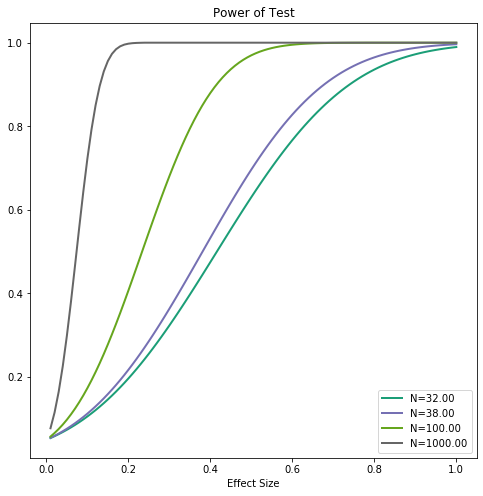

In [2]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array(array(range(1,101))/100)
sample_sizes = array([32,38,100,1000])
print("Power achieved from different sample sizes and effect sizes.")
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
fig1=analysis.plot_power(dep_var='effect_size', 
                         nobs=sample_sizes, 
                         effect_size=effect_sizes,
                         alpha=0.05,
                         alternative='larger')
fig1.set_size_inches(8,8)
pyplot.show()

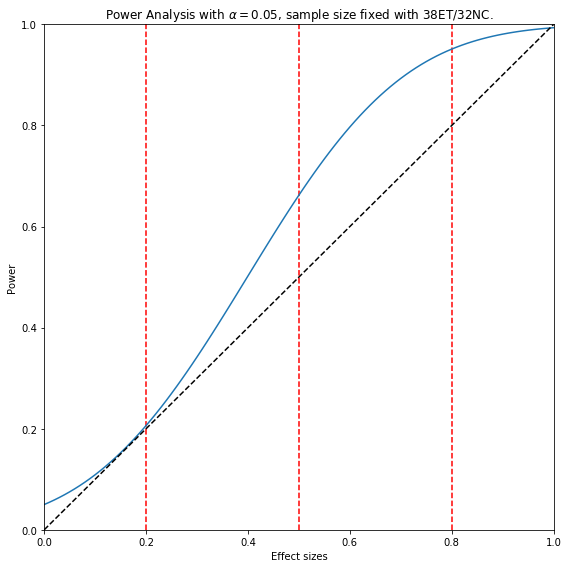

In [3]:
from numpy import array
import matplotlib.pyplot as plt
from statsmodels.stats.power import tt_ind_solve_power
# parameters for power analysis
effect_sizes = array(array(range(0,101))/100)
powers = [ tt_ind_solve_power(effect_size=x, nobs1=32, alpha=0.05, 
                              ratio=38/32, alternative='larger') for x in effect_sizes]
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(effect_sizes,powers)
plt.vlines(0.2, ymin=0, ymax=1, colors='r', linestyles='--', label='ES=0.2')
plt.vlines(0.5, ymin=0, ymax=1, colors='r', linestyles='--', label='ES=0.5')
plt.vlines(0.8, ymin=0, ymax=1, colors='r', linestyles='--', label='ES=0.8')
#plt.vlines(0.6, ymin=0, ymax=1, colors='r', linestyles='--', label='ES=0.6, power=0.9089')
ax.plot(array(range(0,101))/100, array(range(0,101))/100,'k--')
ax.set_xlim([0,1]); ax.set_ylim([0,1]);
ax.set_xlabel('Effect sizes')
ax.set_ylabel('Power')
ax.set_title(r'Power Analysis with $\alpha=0.05$, sample size fixed with 38ET/32NC.')
plt.tight_layout()

# Literature power analysis

In [20]:
# replication for other papres
from math import sqrt
from statsmodels.stats import power
import pandas as pd
def cohend_sts(dat1, dat2):
    # Cohen's d for independent samples with different sample sizes
    import numpy as np
    from math import sqrt
    n1, m1, s1 = dat1; 
    n2, m2, s2 = dat2;
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2)) # calculate the pooled standard deviation
    d_coh_val = (m1 - m2) / s; # calculate the effect size
    #print('Cohens d: %.3f' % d_coh_val)
    return d_coh_val
def cohend_from_z(z,n):
    d_coh_val =  z/sqrt(n);
    return d_coh_val
def cohend_from_z2(z, n1, n2):
    d_coh_val =  z*sqrt(1/n1+1/n2);
    return d_coh_val
def power_cal():
    
    return 

print(r'alpha=0.05, power=0.8, effect size=0.5: sample size:', power.tt_ind_solve_power(effect_size = 0.5, alpha =0.05, power=0.8))


alpha=0.05, power=0.8, effect size=0.5: sample size: 63.765611775409525


1. [Benito-León, J., Alvarez-Linera, J., Hernández-Tamames, J. A., Alonso-Navarro, H., Jiménez-Jiménez, F. J., & Louis, E. D. (2009). Brain structural changes in essential tremor: voxel-based morphometry at 3-Tesla. Journal of the neurological sciences, 287(1-2), 138-142.](https://pubmed.ncbi.nlm.nih.gov/19717167/)

Study type: VBM (peak z-score)

Multiple comparison correction: No, with P=0.001

Study groups: **ET** (19=10:9, 69.8±9.4) verses **NC** (20=10:10, 68.9±10.0);\

Reported ROIs: bilateral cerebellum, bilateral parietal lobes, right frontal lobe, and right insula.

In [29]:
# paper1
p1_n_et=19; p1_n_nc=20; p = 0.001;
p1_roi=['wm_Left_medulla', 'wm_Right_cerebellum_anterior_lobe', 'wm_Right_parietal_lobe_postcentral_gyrus', 'wm_Right_limbic_lobe_uncus',
        'Right_frontal_lobe_MFG','Right_parietal_lobe_precuneus','Left_parietal_lobe_precuneus', 'Right_insula',
    'Left_cerebellum_anterior_lobe', 'Right_cerebellum_anterior_lobe', 'Left_cerebellum_posterior_lobe', 'Left_cerebellum_posterior_lobe'];
p1_z=[3.89, 2.96, 4.36, 4.48, 4.25, 5.09, 4.33, 5.50, 3.31, 4.19, 3.71, 3.72];
p1_cohend = [cohend_from_z2(x, p1_n_et, p1_n_nc) for x in p1_z];
p1_samples_needed = [power.tt_ind_solve_power(effect_size=x, alpha=p, power=0.8) for x in p1_cohend];
p1_power_achieved = [power.tt_ind_solve_power(effect_size=x, nobs1=19, alpha=p, ratio=19/20, alternative='larger') for x in p1_cohend];

p1_res={"VBM_Region":p1_roi,"z-value":p1_z,"Samples needed ("+str(p)+")":p1_samples_needed, "Power achieved with ET/NC("+str(p1_n_et)+"/"+str(p1_n_nc)+")":p1_power_achieved}
p1_df=pd.DataFrame(p1_res)
print("Benito-León paper power analysis with p=0.001 and ET/NC=19/20:")
p1_df

Benito-León paper power analysis with p=0.001 and ET/NC=19/20:


,VBM_Region,z-value,Samples needed (0.001),Power achieved with ET/NC(19/20)
0,wm_Left_medulla,3.89,24.741032,0.671033
1,wm_Right_cerebellum_anterior_lobe,2.96,40.712241,0.344742
2,wm_Right_parietal_lobe_postcentral_gyrus,4.36,20.264540,0.807277
3,wm_Right_limbic_lobe_uncus,4.48,19.341610,0.835565
4,Right_frontal_lobe_MFG,4.25,21.180306,0.778887
5,Right_parietal_lobe_precuneus,5.09,15.616969,0.936682
6,Left_parietal_lobe_precuneus,4.33,20.507373,0.799765
7,Right_insula,5.50,13.780417,0.971124
8,Left_cerebellum_anterior_lobe,3.31,33.111642,0.467172
9,Right_cerebellum_anterior_lobe,4.19,21.710556,0.762441


2. [Benito-León, J., Alvarez-Linera, J., Hernández-Tamames, J. A., Alonso-Navarro, H., Jiménez-Jiménez, F. J., & Louis, E. D. (2009). Brain structural changes in essential tremor: voxel-based morphometry at 3-Tesla. Journal of the neurological sciences, 287(1-2), 138-142.](https://pubmed.ncbi.nlm.nih.gov/19717167/)

Study type: VBM

Study groups: ET() / NC();


In [28]:
# paper1
p1_n_et=19; p1_n_nc=20; p = 0.001;
p1_roi=['wm_Left_medulla', 'wm_Right_cerebellum_anterior_lobe', 'wm_Right_parietal_lobe_postcentral_gyrus', 'wm_Right_limbic_lobe_uncus',
        'Right_frontal_lobe_MFG','Right_parietal_lobe_precuneus','Left_parietal_lobe_precuneus', 'Right_insula',
    'Left_cerebellum_anterior_lobe', 'Right_cerebellum_anterior_lobe', 'Left_cerebellum_posterior_lobe', 'Left_cerebellum_posterior_lobe'];
p1_z=[3.89, 2.96, 4.36, 4.48, 4.25, 5.09, 4.33, 5.50, 3.31, 4.19, 3.71, 3.72];
p1_cohend = [cohend_from_z2(x, p1_n_et, p1_n_nc) for x in p1_z];
p1_samples_needed = [power.tt_ind_solve_power(effect_size=x, alpha=p, power=0.8) for x in p1_cohend];
p1_power_achieved = [power.tt_ind_solve_power(effect_size=x, nobs1=19, alpha=p, ratio=19/20, alternative='larger') for x in p1_cohend];

p1_res={"VBM_Region":p1_roi,"z-value":p1_z,"Samples needed ("+str(p)+")":p1_samples_needed, "Power achieved with ET/NC("+str(p1_n_et)+"/"+str(p1_n_nc)+")":p1_power_achieved}
p1_df=pd.DataFrame(p1_res)
print("Benito-León paper power analysis with p=0.001 and ET/NC=19/20:")
p1_df

'Samples needed (0.001)'

In [34]:
# paper2
p1_n_et=19; p1_n_nc=20; p = 0.001;
p1_roi=['wm_Left_medulla', 'wm_Right_cerebellum_anterior_lobe', 'wm_Right_parietal_lobe_postcentral_gyrus', 'wm_Right_limbic_lobe_uncus',
        'Right_frontal_lobe_MFG','Right_parietal_lobe_precuneus','Left_parietal_lobe_precuneus', 'Right_insula',
    'Left_cerebellum_anterior_lobe', 'Right_cerebellum_anterior_lobe', 'Left_cerebellum_posterior_lobe', 'Left_cerebellum_posterior_lobe'];
p1_z=[3.89, 2.96, 4.36, 4.48, 4.25, 5.09, 4.33, 5.50, 3.31, 4.19, 3.71, 3.72];
p1_cohend = [cohend_from_z2(x, p1_n_et, p1_n_nc) for x in p1_z];
p1_samples_needed = [power.tt_ind_solve_power(effect_size=x, alpha=p, power=0.8) for x in p1_cohend];
p1_power_achieved = [power.tt_ind_solve_power(effect_size=x, nobs1=19, alpha=p, ratio=19/20, alternative='larger') for x in p1_cohend];

p1_res={"VBM_Region":p1_roi,"z-value":p1_z,"Samples needed":p1_samples_needed, 'Power achieved':p1_power_achieved}
p1_df=pd.DataFrame(p1_res)
print("Benito-León paper power analysis: ")
p1_df

[0.022790068035312028,
 0.048419031343727936,
 0.015889747264279386,
 0.014517214258807476,
 0.017271851011994466,
 0.00925851921154408,
 0.016254393749507545,
 0.006896361509328597,
 0.03619911435284984,
 0.01808023608767484,
 0.0262493190976395,
 0.026042726685847173]